# 주제: 지도 학습 - 군집화(Clustering) 알고리즘

* 이번 주에는 **비지도 학습(Unsupervised Learning) 기법 중 하나인 군집화(Clustering) 알고리즘**을 배운다.
* **목표**:
  * 군집화의 개념과 응용 이해
  * 주요 군집화 알고리즘(`K-Means`, `Hierarchical Clustering`, `DBSCAN`) 학습
  * 데이터를 군집화하고 결과를 시각화하는 방법 익히기

# 실습 공간

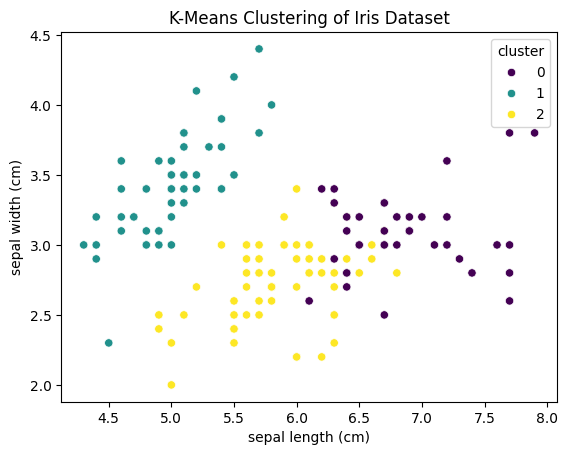

In [ ]:
## 이곳에서 자유롭게 실습을 진행하세요. 코드 셀을 여러개 생성해도 좋습니다. ##
# 기본예제 1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(df)

sns.scatterplot(x=df["sepal length (cm)"], y=df["sepal width (cm)"], hue=df["cluster"], palette="viridis")
plt.title("K-Means Clustering of Iris Dataset")
plt.show()

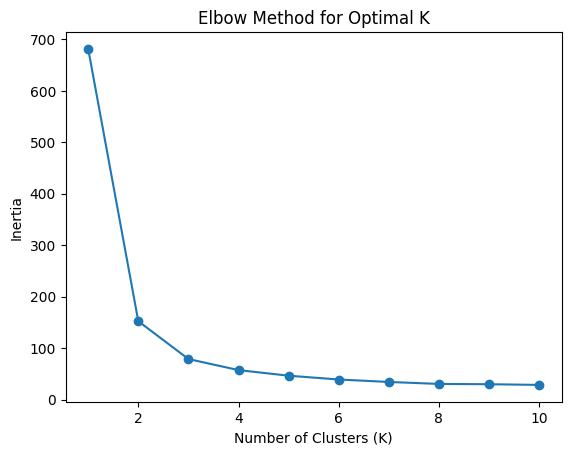

In [ ]:
# 기본예제 2
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.iloc[:, :-1])
    inertia_values.append(kmeans.inertia_)

plt.plot(K_range, inertia_values, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

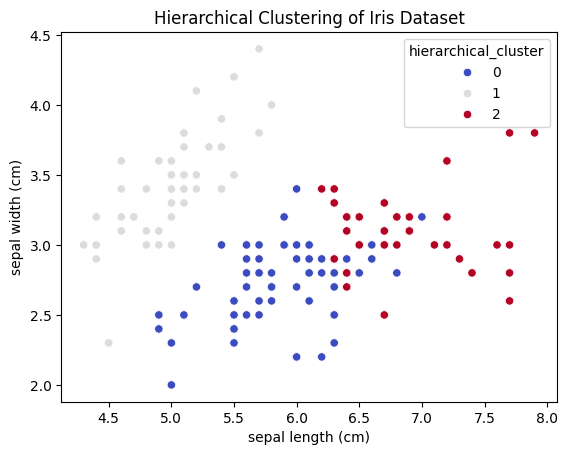

In [ ]:
# 기본예제 3
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3, linkage="ward")
df["hierarchical_cluster"] = hierarchical.fit_predict(df.iloc[:, :-1])

sns.scatterplot(x=df["sepal length (cm)"], y=df["sepal width (cm)"], hue=df["hierarchical_cluster"], palette="coolwarm")
plt.title("Hierarchical Clustering of Iris Dataset")
plt.show()

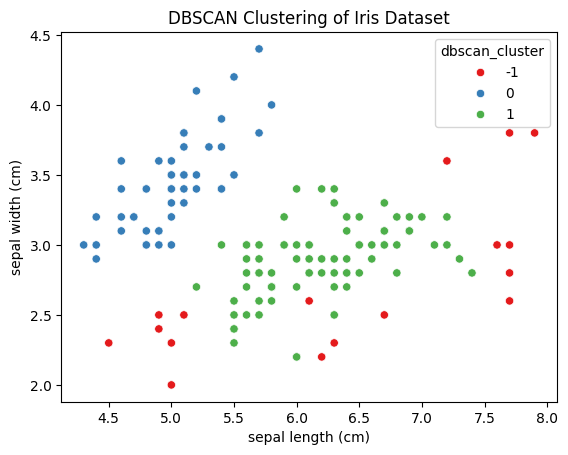

In [ ]:
# 연습문제 4
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df["dbscan_cluster"] = dbscan.fit_predict(df.iloc[:, :-2])

sns.scatterplot(x=df["sepal length (cm)"], y=df["sepal width (cm)"], hue=df["dbscan_cluster"], palette="Set1")
plt.title("DBSCAN Clustering of Iris Dataset")
plt.show()
# 밀도가 낮은(이상치가 있는) 군집은 따로 분류됨

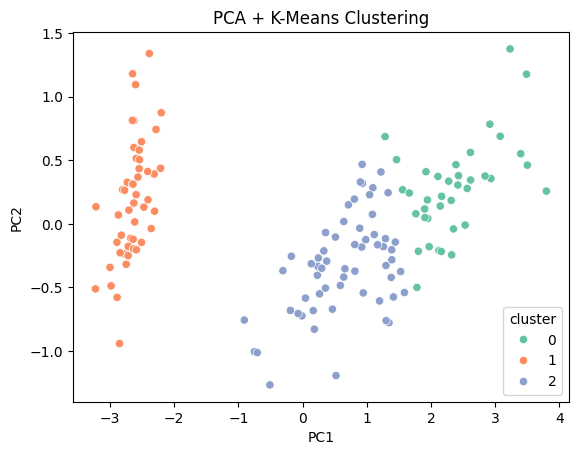

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,hierarchical_cluster,dbscan_cluster
0,5.1,3.5,1.4,0.2,1,1,0
1,4.9,3.0,1.4,0.2,1,1,0
2,4.7,3.2,1.3,0.2,1,1,0
3,4.6,3.1,1.5,0.2,1,1,0
4,5.0,3.6,1.4,0.2,1,1,0


In [ ]:
# 연습문제 5
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df.iloc[:, :-3]), columns=["PC1", "PC2"])

kmeans = KMeans(n_clusters=3, random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)

sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["cluster"], palette="Set2")
plt.title("PCA + K-Means Clustering")
plt.show()

df.head()

# 추가 연습문제 (20 pts)

## 1. KMeans 군집화 후 각 군집의 중심점 출력하기 (2 pts)

> **문제**: `kmeans.cluster_centers_`를 사용하여 각 군집의 중심을 확인하라.

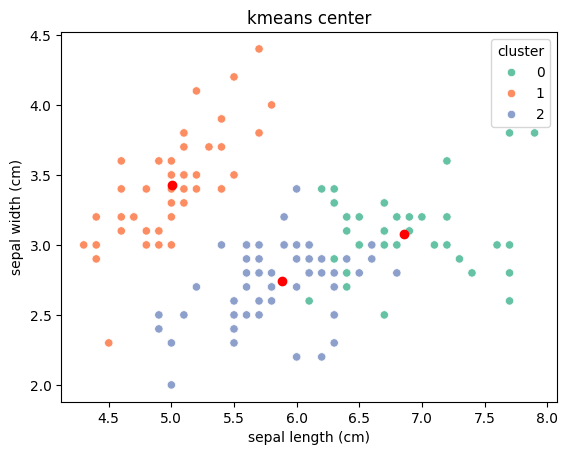

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

km = KMeans(n_clusters=3, random_state=42)
df["cluster"] = km.fit_predict(df)
centers = km.cluster_centers_

sns.scatterplot(x = df["sepal length (cm)"], y=df["sepal width (cm)"], hue = df["cluster"], palette="Set2")
plt.scatter(centers[:, 0], centers[:, 1], c="red")
# scatterplot 함수 실행 후 plt.scatter(변수명[:, 0], 변수명[:, 1], c="색상")을 통해 점을 추가할 수 있음
plt.title("kmeans center")
plt.show()

## 2. Silhouette Score를 사용하여 군집화 평가하기 (2 pts)

> **문제**: `silhouette_score(X, labels)`를 사용하여 군집화의 품질을 평가하라.

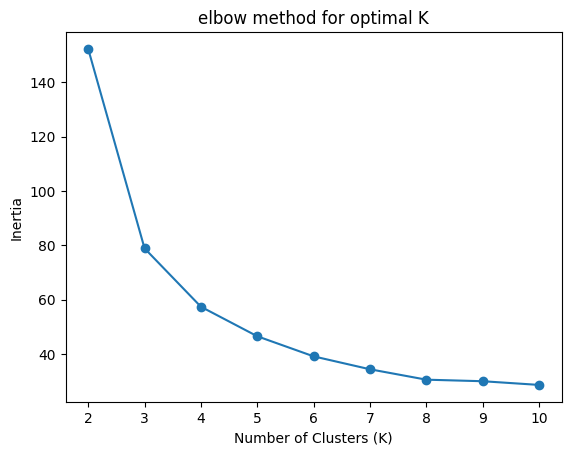

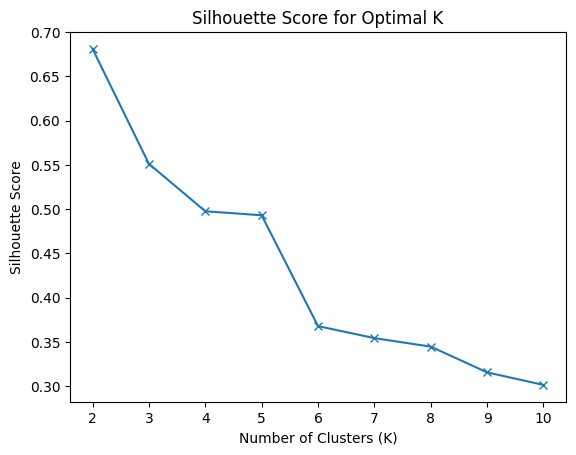

In [ ]:
## YOUR CODE HERE ##

from sklearn.metrics import silhouette_score

inertia_values = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range :
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(df.iloc[:, :-1])
  inertia_values.append(km.inertia_)
  cluster_labels = km.predict(df.iloc[:, :-1])
  score = silhouette_score(df.iloc[:, :-1], cluster_labels)
  silhouette_scores.append(score)

plt.plot(K_range, inertia_values, marker="o", label="inertia")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("elbow method for optimal K")
plt.show()
plt.plot(K_range, silhouette_scores, marker="x", label = "silhouette score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

## 3. Dendrogram을 사용하여 계층적 군집화 결과 시각화하기 (2 pts)

> **문제**: `scipy.cluster.hierarchy.dendrogram()`을 사용하여 덴드로그램을 그려라.

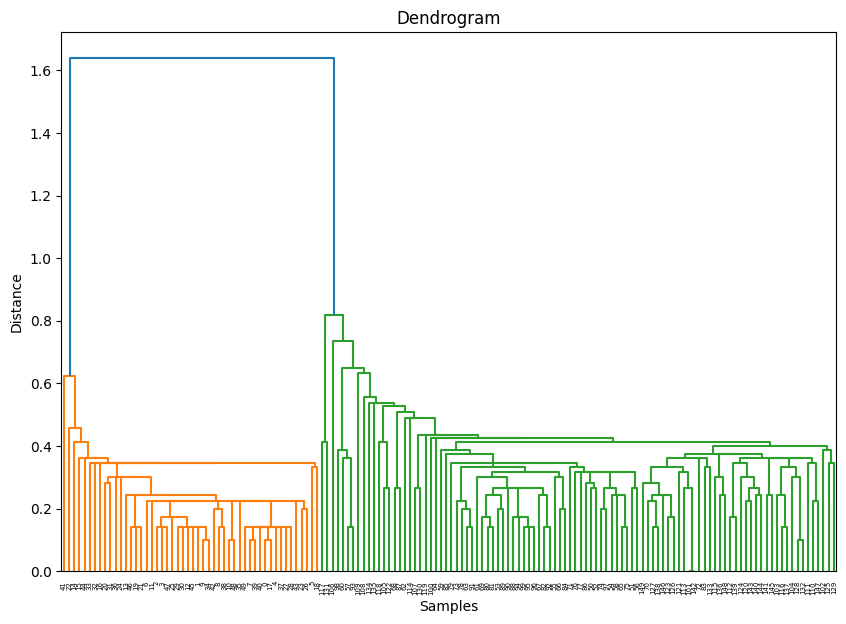

In [ ]:
## YOUR CODE HERE ##

import scipy
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:, :-1]))
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show(dendrogram)

## 4. DBSCAN의 `eps`와 `min_samples` 값을 조정하여 결과 비교하기 (2 pts)

> **문제**: `eps=0.3, 0.5, 0.7`로 설정하여 군집 개수를 비교하라.

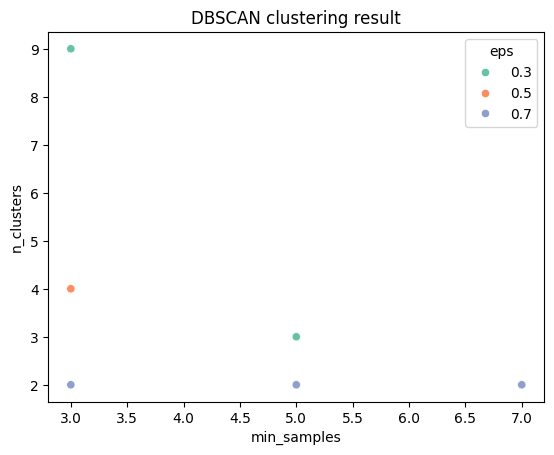

In [ ]:
## YOUR CODE HERE ##

from sklearn.cluster import DBSCAN
import numpy as np

X = df.iloc[:, :-1]
results = []

for a in [0.3, 0.5, 0.7]:
  for b in [3, 5, 7]:
    db = DBSCAN(eps=a, min_samples=b)
    labels = db.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    results.append({"eps":a, "min_samples":b, "n_clusters":n_clusters})

results_df = pd.DataFrame(results, columns=["eps", "min_samples", "n_clusters"])

sns.scatterplot(x=results_df["min_samples"], y=results_df["n_clusters"], hue=results_df["eps"], palette="Set2")
plt.title("DBSCAN clustering result")
plt.xlabel("min_samples")
plt.ylabel("n_clusters")
plt.legend(title="eps")
plt.show()

## 5. Gaussian Mixture Model (GMM)을 사용하여 군집화 수행하기 (2 pts)

> **문제**: `GaussianMixture(n_components=k)`을 사용하여 군집화를 수행하라.

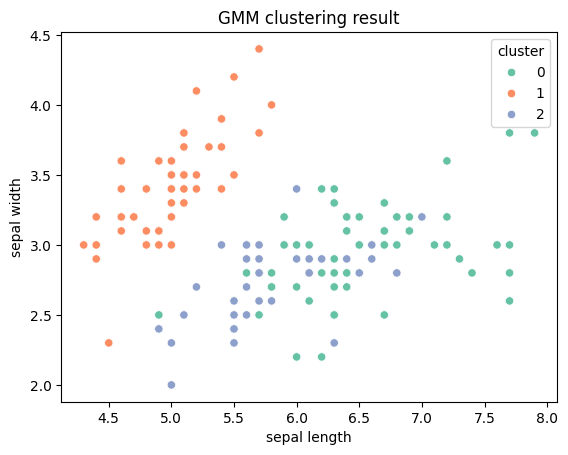

In [ ]:
## YOUR CODE HERE ##

from sklearn.mixture import GaussianMixture as GMM

X = df.iloc[:, :-1]

gmm = GMM(n_components = 3, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

df["gmm_cluster"] = labels

sns.scatterplot(x=df["sepal length (cm)"], y=df["sepal width (cm)"], hue=df["gmm_cluster"], palette="Set2")
plt.title("GMM clustering result")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend(title="cluster")
plt.show()

## 6. KMeans를 사용한 이미지 색상 압축 (2 pts)

> **문제**: `KMeans(n_clusters=k)`를 사용하여 이미지의 주요 색상을 추출하라.

In [ ]:
## YOUR CODE HERE ##

from PIL import Image
import os
print(os.getcwd())

# 마땅한 파일이 없어 제 컴퓨터의 파일을 업로드하였습니다
image = Image.open("고양이.jpg")
image_array = np.array(image)
pixels = image_array.reshape((-1, 3))

km = KMeans(n_clusters = 5)
km.fit(pixels)
labels = km.labels_
centers = km.cluster_centers_

plt.imshow(image)
plt.title("original image")
plt.show()
print(f"주요 색상: {np.uint8(centers)}")

/content


## 7. PCA를 사용하여 차원 축소 후 DBSCAN 적용하기 (2 pts)

> **문제**: `PCA(n_components=2)`를 사용하여 새로운 데이터를 클러스터에 배정하라.

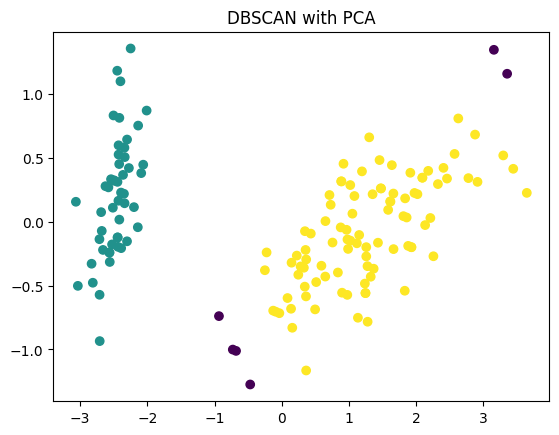

In [ ]:
## YOUR CODE HERE ##

from sklearn.decomposition import SparsePCA

df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df.iloc[:, :-1]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

db = DBSCAN(eps=0.5, min_samples=5)
clusters = db.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.title("DBSCAN with PCA")

plt.show()

## 8. 군집화된 데이터를 사용하여 새로운 샘플 예측하기 (2 pts)

> **문제**: `kmeans.predict()`를 사용하여 새로운 데이터를 클러스터에 배정하라.

In [ ]:
## YOUR CODE HERE ##

df = pd.DataFrame(iris.data, columns=iris.feature_names)
new_data = pd.DataFrame(columns = df.columns)
new_data.loc[0] = [1.1, 0.8, 7.4, 8]
new_data.loc[1] = [7.9, 7.0, 1.2, 5]

km = KMeans(n_clusters=3, random_state=42)
km.fit(df)
new_clusters = km.predict(new_data)

print(f"클러스터: {new_clusters}")

클러스터: [0 1]


## 9. 고차원 데이터(5차원 이상)에서 t-SNE를 사용하여 군집 시각화하기 (2 pts)

> **문제**: `TSNE(n_components=2)`를 사용하여 데이터를 시각적으로 표현하라.

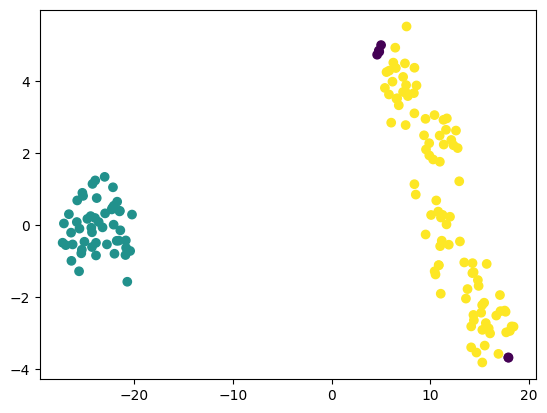

In [ ]:
## YOUR CODE HERE ##

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters)
plt.show()

## 10. AgglomerativeClustering을 사용하여 최적의 군집 개수 찾기 (2 pts)

> **문제**: `silhouette_score()`를 사용하여 최적의 K 값을 찾으라.

In [ ]:
## YOUR CODE HERE ##

from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.metrics import silhouette_score

range=[2, 3, 4, 5, 6]
silhouette_scores = []
for a in range:
  ac = AC(n_clusters=a)
  labels = ac.fit_predict(df)
  score = silhouette_score(df, labels)
  silhouette_scores.append(score)

optimal_k = range[silhouette_scores.index(max(silhouette_scores))]
print(f"optimal k: {optimal_k}")

optimal k: 2
